# 資料科學家培訓班0724加分作業
### 第3小隊-陳珮婕

## 作業前準備

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip3 install numpy scipy pandas matplotlib
import numpy as np
import pandas as pd

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 匯入資料(任務一)

In [ ]:
data2=pd.read_excel('/content/gdrive/MyDrive/資料科學家/第四堂課程練習/sales_data.xlsx', index_col=None)

查看前5筆資料，看是否有成功匯入

In [ ]:
data=data2.copy()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35112 entries, 0 to 35111
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   年                35112 non-null  object 
 1   月                35112 non-null  int64  
 2   日                35112 non-null  int64  
 3   Customer Age     35112 non-null  int64  
 4   Customer Gender  35112 non-null  object 
 5   Country          35112 non-null  object 
 6   State            35112 non-null  object 
 7   Category         35112 non-null  object 
 8   Product          35112 non-null  object 
 9   Quantity         35108 non-null  float64
 10  Unit Cost        35112 non-null  float64
 11  Unit Price       35112 non-null  float64
 12  Cost             35112 non-null  float64
 13  Revenue          35112 non-null  float64
 14  Profit           35112 non-null  float64
 15  Event            35112 non-null  object 
dtypes: float64(6), int64(3), object(7)
memory usage: 4.3+ MB


透過excel的"篩選"功能，可以注意到有些資料不合裡，因此需要先進行處理

In [ ]:
print(len(data))
data.isna().sum()

35112


年                  0
月                  0
日                  0
Customer Age       0
Customer Gender    0
Country            0
State              0
Category           0
Product            0
Quantity           4
Unit Cost          0
Unit Price         0
Cost               0
Revenue            0
Profit             0
Event              0
dtype: int64

將不屬於2018年份的資料進行刪除


In [ ]:
count=0
delete_year_data=[]
data_column=data.columns
for i in data['年']:
  if(i!=2018):
    data_iloc=data.iloc[count:count+1,0:len(data_column)]
    data.drop(index=count,axis=0,inplace=True)
  count+=1
print(len(data))


35111


有4筆資料在Quantity的部分有缺漏，由於該部分資料的數量不多，對結果的影響不大，因此我選擇刪除

In [ ]:
data=data.dropna()
print(len(data))

35107


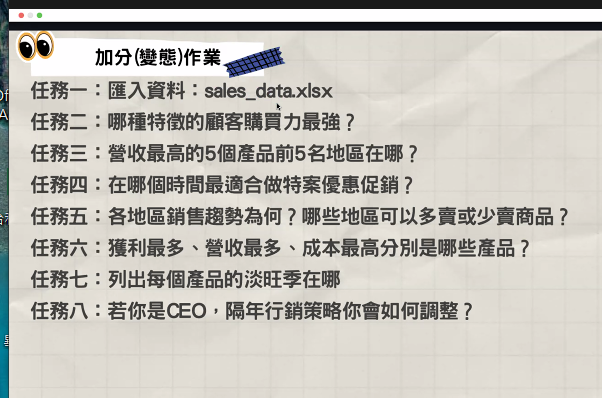

統計所有產品的cost,revenue,profit以及在4季各別銷售出的數量

spring=1 ~ 3,  summer=4 ~ 6,  fall=7 ~ 9,  winter=10 ~ 12(月)

In [ ]:
products=data['Product'].unique().tolist()
#print(products)
items=['cost','revenue','profit','spring','summer','fall','winter']
product_df=pd.DataFrame(columns=items,index=products)
#print(product_df)
for i in products:
  product_df.loc[i,'cost']=data[data['Product']==i]['Cost'].sum()
  product_df.loc[i,'revenue']=data[data['Product']==i]['Revenue'].sum()
  product_df.loc[i,'profit']=data[data['Product']==i]['Profit'].sum()
  product_df.loc[i,'spring']=int(data[(data['Product']==i)&(data['月']<4)]['Quantity'].sum())
  product_df.loc[i,'summer']=int(data[(data['Product']==i)&(data['月']<7)&(data['月']>3)]['Quantity'].sum())
  product_df.loc[i,'fall']=int(data[(data['Product']==i)&(data['月']<10)&(data['月']>6)]['Quantity'].sum())
  product_df.loc[i,'winter']=int(data[(data['Product']==i)&(data['月']>9)]['Quantity'].sum())

print(product_df)

                         cost     revenue      profit spring summer  fall  \
Bottles and Cages   579820.54    709381.0   129560.46   2614   2659  2682   
Fenders             259032.84    329204.0    71403.16    398    372   352   
Helmets            2219735.59   2738210.0   518474.41   2163   2066  2027   
Hydration Packs     330935.06    403276.0    72340.94    197    233   185   
Tires and Tubes    2353790.93   2865915.0   512124.07   5437   5501  5587   
Mountain Bikes     3522274.87   5176456.0  1654181.13   1332   1329  1445   
Road Bikes         2676671.45   3921989.0  1245317.55   1591   1526  1516   
Touring Bikes      2283327.44  3224470.06   941142.73    669    672   678   
Caps                 212382.0    255992.0     43610.0    685    805   737   
Gloves              182536.04    228353.0    45816.96    217    228   237   
Jerseys            1533233.87   1834110.0   300876.13    997   1022  1017   
Socks                 51696.0     61237.0      9541.0    179    202   224   

統計各地區的產品銷售狀況(銷售數量)

In [ ]:
states=data['State'].unique().tolist()
state_product_df=pd.DataFrame(columns=products,index=states)

for i in states:
  for j in products:
    state_product_df.loc[i,j]=int(data[(data['State']==i)&(data['Product']==j)]['Quantity'].sum())

print(state_product_df)

                    Bottles and Cages Fenders Helmets Hydration Packs  \
England                          1868     165    1641             138   
Washington                       1629     276    1220             123   
California                       3370     591    2254             296   
Seine Saint Denis                 233      16     208              20   
Nord                              171      21     191              12   
Seine (Paris)                     266      33     276              13   
Nordrhein-Westfalen               335      44     273              26   
Bayern                            193      22     198               7   
Hamburg                           283      39     223               6   
Hessen                            331      28     324              18   
Saarland                          335      48     323              19   
Oregon                            787     144     507              54   
Hauts de Seine                    153      14     1

上方為較仔細的資料，下方df同樣是表示各地區的產品銷售狀況(銷售數量)，只是從較大的方向進行分析

In [ ]:
countries=data['Country'].unique().tolist()
categories=data['Category'].unique().tolist()
country_category_df=pd.DataFrame(columns=categories,index=countries)

for i in countries:
  for j in categories:
    country_category_df.loc[i,j]=int(data[(data['Country']==i)&(data['Category']==j)]['Quantity'].sum())

print(country_category_df)

               Accessories Bikes Clothing
United Kingdom        7907  3014     1890
US                   24107  7126     5747
France                6626  2335     1451
Germany               6405  2630     1393


統計各地區的利潤狀況(總利潤，負利潤總合，正利潤總合,特價品所帶來的利潤總合)

In [ ]:
profits=['profit_sum','positive_profit_sum','negative_profit_sum','rebate__profit_sum']
product_profit_df=pd.DataFrame(columns=profits,index=states)
for i in states:
  product_profit_df.loc[i,'profit_sum']=data[(data['State']==i)]['Profit'].sum()
  product_profit_df.loc[i,'positive_profit_sum']=data[(data['State']==i)&(data['Profit']>=0)]['Profit'].sum()
  product_profit_df.loc[i,'negative_profit_sum']=data[(data['State']==i)&(data['Profit']<0)]['Profit'].sum()
  product_profit_df.loc[i,'rebate__profit_sum']=data[(data['State']==i)&(data['Event']=='特案優惠')]['Profit'].sum()

print(product_profit_df)

                     profit_sum positive_profit_sum negative_profit_sum  \
England              1045884.56           1046512.6             -628.04   
Washington            649758.43           653241.91            -3483.48   
California           1350782.65          1355926.99            -5144.34   
Seine Saint Denis     127437.85           133842.81            -6404.96   
Nord                  116940.78           125106.04            -8165.26   
Seine (Paris)         176819.75           186741.32            -9921.57   
Nordrhein-Westfalen   345609.65           345609.65                 0.0   
Bayern                201873.34           202034.54              -161.2   
Hamburg               257497.89            257565.9              -68.01   
Hessen                335188.33           335188.33                 0.0   
Saarland              392409.16           392668.73             -259.57   
Oregon                309986.57           311784.32            -1797.75   
Hauts de Seine         89

統計各地區各月份交易數量

In [ ]:
months=range(1, 13)
state_count_df=pd.DataFrame(columns=months,index=states)
for i in states:
  for j in months:
    temp=data[(data['State']==i)&(data['月']==j)]['月'].tolist()
    state_count_df.loc[i,j]=len(temp)

print(state_count_df)

                      1    2    3    4    5    6    7    8    9    10   11  \
England              535  468  523  554  545  562  538  516  532  559  554   
Washington           461  402  458  403  459  456  437  431  415  445  468   
California           889  802  881  856  906  807  891  892  846  903  889   
Seine Saint Denis     83   62   62   63   75   59   60   66   62   77   62   
Nord                  70   63   60   68   61   77   63   71   65   46   70   
Seine (Paris)         92   91  103   75   80   77   84  101  102  104   77   
Nordrhein-Westfalen   93   99   96   93   99   89  103  102   93  103  101   
Bayern                65   59   53   59   42   38   52   64   56   61   46   
Hamburg               82   53   70   51   85   80   91   77   77   87   63   
Hessen                99   87   91   85   93   89   98   98   83  103   91   
Saarland             104   99  109  121   91   95  103  117  107  118  104   
Oregon               171  182  219  200  216  223  210  197  186

統計各年齡段男女提供的利潤總合

In [ ]:
ages=['<10','10~19','20~29','30~39','40~49','50~59','60~69','70~79','80~89','<=90']
genders=data['Customer Gender'].unique().tolist()
gender_age_df=pd.DataFrame(columns=ages,index=genders)
for i in genders:
  gender_age_df.loc[i,'<10']=data[(data['Customer Gender']==i)&(data['Customer Age']<10)]['Profit'].sum()
  gender_age_df.loc[i,'10~19']=data[(data['Customer Gender']==i)&(data['Customer Age']<20)&(data['Customer Age']>=10)]['Profit'].sum()
  gender_age_df.loc[i,'20~29']=data[(data['Customer Gender']==i)&(data['Customer Age']<30)&(data['Customer Age']>=20)]['Profit'].sum()
  gender_age_df.loc[i,'30~39']=data[(data['Customer Gender']==i)&(data['Customer Age']<40)&(data['Customer Age']>=30)]['Profit'].sum()
  gender_age_df.loc[i,'40~49']=data[(data['Customer Gender']==i)&(data['Customer Age']<50)&(data['Customer Age']>=40)]['Profit'].sum()
  gender_age_df.loc[i,'50~59']=data[(data['Customer Gender']==i)&(data['Customer Age']<60)&(data['Customer Age']>=50)]['Profit'].sum()
  gender_age_df.loc[i,'60~69']=data[(data['Customer Gender']==i)&(data['Customer Age']<70)&(data['Customer Age']>=60)]['Profit'].sum()
  gender_age_df.loc[i,'70~79']=data[(data['Customer Gender']==i)&(data['Customer Age']<80)&(data['Customer Age']>=70)]['Profit'].sum()
  gender_age_df.loc[i,'80~89']=data[(data['Customer Gender']==i)&(data['Customer Age']<90)&(data['Customer Age']>=80)]['Profit'].sum()
  gender_age_df.loc[i,'<=90']=data[(data['Customer Gender']==i)&(data['Customer Age']>=90)]['Profit'].sum()

print(gender_age_df)

   <10      10~19      20~29      30~39      40~49      50~59     60~69  \
M  0.0  113404.65   932920.3  947263.82  690575.64  272974.54  46034.22   
F  0.0   79388.46  717640.33  963364.84  650770.11  286563.16  50011.14   

     70~79    80~89 <=90  
M  5503.01   2003.0  0.0  
F  4697.18  1521.02  0.0  


## 哪種特徵的顧客購買力最強(任務二)

In [ ]:
max_benfit_customer=0
for i in genders:
  for j in ages:
    if (gender_age_df.loc[i,j]>max_benfit_customer):
      max_benfit_age=j
      max_benfit_gender=i
      max_benfit_customer=gender_age_df.loc[i,j]
print("以10為間距來看，年齡為",max_benfit_age,"的",max_benfit_gender,"(F=男性,M=女性)購買力最強")
print("以地區來看，購買力最強的地區與該地利潤總合為")
print(product_profit_df.sort_values('profit_sum',ascending =False).head(1)["profit_sum"])

以10為間距來看，年齡為 30~39 的 F (F=男性,M=女性)購買力最強
以地區來看，購買力最強的地區與該地利潤總合為
California    1350782.65
Name: profit_sum, dtype: object


## 營收最高的5個產品前5名地區在哪(任務三)&

##獲利最多，營收最多，成本最高分別為哪些產品?(任務六)

In [ ]:
top5_products_profit=product_df.sort_values('profit',ascending =False).head()
top5_products_profit=top5_products_profit.index.tolist()
print("獲利最高的5個產品為:",top5_products_profit)
top5_products_cost=product_df.sort_values('cost',ascending =False).head()
top5_products_cost=top5_products_cost.index.tolist()
print("成本最高的5個產品為:",top5_products_cost)
top5_products_revenue=product_df.sort_values('revenue',ascending =False).head()
top5_products_revenue=top5_products_revenue.index.tolist()
print("營收最高的5個產品為:",top5_products_revenue)
print()
print("營收最高的5個產品前5名地區:")
for i in top5_products_revenue:
  top5_products_states=state_product_df.sort_values(i,ascending =False).head().index.tolist()
  print("產品名:",i)
  print("前5名區域",top5_products_states)


獲利最高的5個產品為: ['Mountain Bikes', 'Road Bikes', 'Touring Bikes', 'Helmets', 'Tires and Tubes']
成本最高的5個產品為: ['Mountain Bikes', 'Road Bikes', 'Tires and Tubes', 'Touring Bikes', 'Helmets']
營收最高的5個產品為: ['Mountain Bikes', 'Road Bikes', 'Touring Bikes', 'Tires and Tubes', 'Helmets']

營收最高的5個產品前5名地區:
產品名: Mountain Bikes
前5名區域 ['California', 'England', 'Washington', 'Oregon', 'Saarland']
產品名: Road Bikes
前5名區域 ['California', 'England', 'Washington', 'Oregon', 'Saarland']
產品名: Touring Bikes
前5名區域 ['California', 'England', 'Washington', 'Oregon', 'Saarland']
產品名: Tires and Tubes
前5名區域 ['California', 'England', 'Washington', 'Oregon', 'Saarland']
產品名: Helmets
前5名區域 ['California', 'England', 'Washington', 'Oregon', 'Hessen']


## 在哪個時間最適合做特案優惠促銷(任務四)

我認為優惠促銷除了針對商品的淡季之外，也可以在該地區較易數量較低的時候舉辦，由於商品淡季已呈現在任務七，因此這部分我主要呈現**各地區的交易淡季**

In [ ]:
print("各地交易數量最少的月份")
for i in states:
  print(i,end=":")
  min_data=state_count_df.min(axis=1)

  for j in months:
    if state_count_df.loc[i,j]==min_data[i]:
      print(j,end=" ")
  print()


England:2 
Washington:2 
California:2 
Seine Saint Denis:6 
Nord:10 
Seine (Paris):4 
Nordrhein-Westfalen:6 
Bayern:6 
Hamburg:4 
Hessen:9 
Saarland:5 
Oregon:1 
Hauts de Seine:1 
Yveline:10 
Loir et Cher:11 12 
Essonne:5 
Somme:10 
Loiret:5 
Alabama:2 3 4 5 6 7 8 10 11 12 
Garonne (Haute):5 6 
Moselle:11 
North Carolina:2 3 4 5 6 7 9 10 11 12 
Val de Marne:5 
Val d'Oise:5 
Seine et Marne:3 
Missouri:2 3 4 5 6 7 8 9 10 11 12 
Ohio:2 4 7 12 
Brandenburg:2 
Kentucky:3 4 5 6 8 9 11 
Texas:3 6 10 12 
Pas de Calais:2 
Florida:3 4 6 8 10 12 
Charente-Maritime:1 
Illinois:1 4 6 12 
Mississippi:1 2 4 5 7 8 9 10 11 12 
New York:1 2 4 7 10 
Virginia:1 2 4 5 6 7 8 9 10 11 
Utah:1 2 7 8 10 11 12 
Montana:1 2 3 4 6 7 8 10 11 12 
Wyoming:1 2 3 4 6 8 9 10 12 
South Carolina:1 2 3 4 8 9 10 11 
Georgia:1 2 3 4 5 7 8 10 11 12 
Arizona:1 2 3 4 5 6 8 9 10 11 12 
Minnesota:1 2 3 4 5 6 7 9 11 
Massachusetts:1 2 3 4 5 6 7 8 9 11 12 


## 各地區銷售趨勢為何?那些地區可以多賣或是少賣產品?(任務五)

我發現有些交易的利潤為負值，若是能夠減少這些交易的數量，就能提升利潤總和。==>少出售特並產品

此外，我認為若是能夠舉辦優惠促銷，應當能夠適讀提升某些地區的利潤==>利用優惠，來多賣產品

In [ ]:
no_rebate=[]
print("建議減少出售特定產品的地區(多->少排序)")
product_profit_df=product_profit_df.sort_values('negative_profit_sum',ascending =True)
improve_states=product_profit_df.index.tolist()
for i in improve_states:
  if product_profit_df.loc[i,'negative_profit_sum']!=0:
    print(i,'   負利潤交易總和',product_profit_df.loc[i,'negative_profit_sum'])
  if product_profit_df.loc[i,'rebate__profit_sum']==0:
    no_rebate.append(i)
print("未舉辦優惠促銷的地區(可利用優惠，提升利潤):",no_rebate)


建議減少出售特定產品的地區(多->少排序)
Seine (Paris)    負利潤交易總和 -9921.57
Nord    負利潤交易總和 -8165.26
Seine Saint Denis    負利潤交易總和 -6404.96
California    負利潤交易總和 -5144.34
Essonne    負利潤交易總和 -4247.35
Hauts de Seine    負利潤交易總和 -3895.2100000000005
Washington    負利潤交易總和 -3483.48
Yveline    負利潤交易總和 -3434.81
Oregon    負利潤交易總和 -1797.7499999999998
Seine et Marne    負利潤交易總和 -1455.04
Loiret    負利潤交易總和 -1263.92
Moselle    負利潤交易總和 -1220.1299999999999
Garonne (Haute)    負利潤交易總和 -1087.4299999999998
Charente-Maritime    負利潤交易總和 -903.41
Val de Marne    負利潤交易總和 -813.02
Val d'Oise    負利潤交易總和 -764.99
England    負利潤交易總和 -628.04
Somme    負利潤交易總和 -493.0
Loir et Cher    負利潤交易總和 -433.03
Saarland    負利潤交易總和 -259.57
Pas de Calais    負利潤交易總和 -176.0
Bayern    負利潤交易總和 -161.2
Hamburg    負利潤交易總和 -68.01
Utah    負利潤交易總和 -18.0
Illinois    負利潤交易總和 -6.0
Texas    負利潤交易總和 -3.0
未舉辦優惠促銷的地區(可利用優惠，提升利潤): ['Seine (Paris)', 'Nord', 'Seine Saint Denis', 'Essonne', 'Hauts de Seine', 'Yveline', 'Seine et Marne', 'Loiret', 'Moselle', 'Garonne (Haute)', 

## 列出每個產品的淡旺季(任務七)


In [ ]:
#類似於上方的取最大值方法
seasons=['spring','summer','fall','winter']

for i in products:
  max=0
  min=product_df.loc[i,'spring']
  for j in seasons:
    if product_df.loc[i,j]>max:
      max=product_df.loc[i,j]
      max_season=str(j)
    if product_df.loc[i,j]<min:
      min=product_df.loc[i,j]
      min_season=str(j)
  print("產品名:",i," 旺季:",max_season," 淡季:",min_season)

產品名: Bottles and Cages  旺季: fall  淡季: winter
產品名: Fenders  旺季: spring  淡季: fall
產品名: Helmets  旺季: spring  淡季: fall
產品名: Hydration Packs  旺季: summer  淡季: winter
產品名: Tires and Tubes  旺季: winter  淡季: winter
產品名: Mountain Bikes  旺季: fall  淡季: summer
產品名: Road Bikes  旺季: spring  淡季: winter
產品名: Touring Bikes  旺季: winter  淡季: winter
產品名: Caps  旺季: summer  淡季: winter
產品名: Gloves  旺季: fall  淡季: winter
產品名: Jerseys  旺季: summer  淡季: winter
產品名: Socks  旺季: fall  淡季: winter
產品名: Vests  旺季: fall  淡季: winter
產品名: Bike Stands  旺季: spring  淡季: summer
產品名: Cleaners  旺季: winter  淡季: summer
產品名: Shorts  旺季: summer  淡季: winter
產品名: Bike Racks  旺季: fall  淡季: winter


## 若你是CEO，隔年行銷策略會如何調整?(任務八)

1.降低負利潤的交易數

2.搭配各地區與產品的銷售淡季，舉辦特價銷售

3.釐清為何部分店家有許多月份的交易數量為0

4.在節日舉辦活動(ex:聖誕節、母親節、父親節...)，讓中年族群的產品帶動其他族群的產品銷售